In [1]:
# Question1 Reversing List entity

# By using in-built function

Input1  = [12, 35, 9, 56, 24]

Input1.reverse()

print ("output1 Reversing:", Input1)

# Just to get output as per the assingment
Input  = [12, 35, 9, 56, 24]
list=[]
list.append(Input[4])
list.append(Input[1])
list.append(Input[2])
list.append(Input[3])
list.append(Input[0])

print("output2 Swapping:",list)



output1 Reversing: [24, 56, 9, 35, 12]
output2 Swapping: [24, 35, 9, 56, 12]


In [2]:
# By slicing technique
Input = [1,2,3]

print("output Reversing:",Input [::-1])

output Reversing: [3, 2, 1]


In [3]:
# Question2 Swapping List entity
Input = [12,35,9,56, 24]

list=[]
list.append(Input[0])
list.append(Input[2])
list.append(Input[1])
list.append(Input[3])
list.append(Input[4])

print("output:",list)

    
    
   


output: [12, 9, 35, 56, 24]


In [4]:
# Question3 Reversing of string
input_str  = 'This is CVL757'
input_str[::-1]

'757LVC si sihT'

In [5]:
# Question4 Reversing the order of words in a string

input_str  = 'This is CVL757'
# Split the string
a = input_str.split()
#Reverse the word
a.reverse()
#join 
output_str = " ".join(a)
print(output_str)



CVL757 is This


In [6]:
# Que 5 Random Matrix

import numpy as np
seed_values = 20
np.random.seed(seed_values)
a = np.random.rand(3,3)
print(a)

[[0.5881308  0.89771373 0.89153073]
 [0.81583748 0.03588959 0.69175758]
 [0.37868094 0.51851095 0.65795147]]


In [7]:
#Que6 Swap the columns of random_matrix

a[:,[0,2]] = a[:,[2,0]]
print(a)

[[0.89153073 0.89771373 0.5881308 ]
 [0.69175758 0.03588959 0.81583748]
 [0.65795147 0.51851095 0.37868094]]


In [8]:
#Que7 Swap the row of random_matrix
a[[0,2],:] = a[[2,0],:]
print(a)


[[0.65795147 0.51851095 0.37868094]
 [0.69175758 0.03588959 0.81583748]
 [0.89153073 0.89771373 0.5881308 ]]


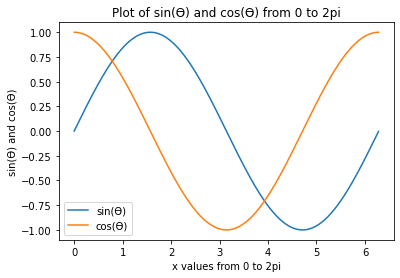

In [9]:
 # Question 8 - Plot the sine and cosine curves as shown below
import matplotlib.pyplot as plt
x = np.arange(0,2*np.pi,0.01)
y=np.sin(x)
z=np.cos(x)
plt.plot(x,y,x,z)
plt.xlabel('x values from 0 to 2pi')  
plt.ylabel('sin(\u03F4) and cos(\u03F4)')
plt.title('Plot of sin(\u03F4) and cos(\u03F4) from 0 to 2pi')
plt.legend(['sin(\u03F4)', 'cos(\u03F4)'])     
plt.show()

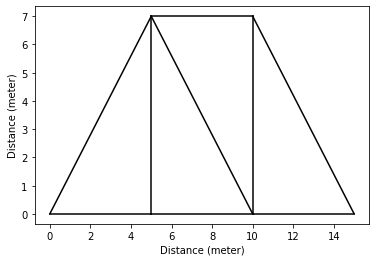

In [10]:
#Question 9 Plot of the truss

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os

nodes = [[0, 0], [5, 7], [5, 0], [10, 7], [10, 0], [15, 0]]

connections = np.array([[1, 2], [1, 3], [2, 3], [2, 4], [2, 5], [3, 5], [4, 5], [4, 6], [5, 6]]) - 1

x = []
y = []
plt.figure()
for connection in connections:
    initial, final = connection
    x1, y1 = nodes[initial]
    x2, y2 = nodes[final]
    plt.xlabel("Distance (meter)")
    plt.ylabel("Distance (meter)")
    plt.plot([x1, x2], [y1, y2], color='black')

In [11]:
#Question 10 Truss analysis

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os

E = 200e06
A = 0.005
nodes = [[0, 0], [5, 7], [5, 0], [10, 7], [10, 0], [15, 0]]

connections = np.array([[1, 2], [1, 3], [2, 3], [2, 4], [2, 5], [3, 5], [4, 5], [4, 6], [5, 6]]) - 1

no_nodes = len(nodes)
K_Structure = np.zeros((no_nodes*2, no_nodes*2))
F_Structure = np.zeros((no_nodes*2, 1))

#Developing Global stiffness matrix and Defining loads for member of Structure

support_nodes = [[0, 0], [15, 0]]

temp_res_dof = []
temp_free_dof = []

for member in connections:
    initial_node_index, final_node_index = member
    x1, y1  = nodes[initial_node_index]
    x2, y2 = nodes[final_node_index]

    L = ((x2-x1)**2 + (y2-y1)**2)**0.5 
    lx, ly = (x2-x1)/L, (y2-y1)/L

    T = np.array([[lx, ly, 0, 0 ],
                [0, 0, lx, ly]])
    Tt = T.transpose()
 
    K = np.array([[1, -1],
                [-1, 1]]) * (A * E / L)
 
    K_G_local = np.dot(np.dot(Tt, K), T)
    dof = [initial_node_index*2, initial_node_index*2 + 1,
        final_node_index*2, final_node_index*2 + 1]
    K_Structure[np.ix_(dof, dof)] += K_G_local
    
    if (member[0] == 0) and (member[1] == 1):
        temp_f = np.array([[0], [0], [20], [0]])
        F_Structure[np.ix_(dof)] += temp_f

    if nodes[initial_node_index] in support_nodes:
        temp_res_dof.append(initial_node_index*2)
        temp_res_dof.append(initial_node_index*2 + 1)
    else:
        temp_free_dof.append(initial_node_index*2)
        temp_free_dof.append(initial_node_index*2 + 1)
  
    if nodes[final_node_index] in support_nodes:
        temp_res_dof.append(final_node_index*2)
        temp_res_dof.append(final_node_index*2 + 1)
    else:
        temp_free_dof.append(final_node_index*2)
        temp_free_dof.append(final_node_index*2 + 1)

res_dof = []
free_dof = []
for item in temp_free_dof:
    if item not in free_dof:
        free_dof.append(item)
for item in temp_res_dof:
    if item not in res_dof:
        res_dof.append(item)

print("\nGlobal stiffness matrix and loads for member of Structure is defined.. \n",K_Structure)

print("\nRes dof number : {}\nfree dof number : {}\n".format(len(res_dof), len(free_dof)))

# Displacement and Support Reaction Calculation

K_ff = K_Structure[np.ix_(free_dof, free_dof)]
K_rf = K_Structure[np.ix_(res_dof, free_dof)]
F_ff = F_Structure[np.ix_(free_dof)]
Displacements = np.dot(np.linalg.inv(K_ff), F_ff)
reactions = np.dot(K_rf, Displacements)
print("Support Reactions (kN) \n",reactions)
print("Displacements \n",Displacements)

# Stress calculation in each member
k_temp = K_Structure[2:10, 2:10]
force = k_temp @ Displacements
Stress = force/A
print("Stress in Each Element \n",Stress)


Global stiffness matrix and loads for member of Structure is defined.. 
 [[ 239272.85092697   54981.99129775  -39272.85092697  -54981.99129775
  -200000.               0.               0.               0.
        0.               0.               0.               0.        ]
 [  54981.99129775   76974.78781685  -54981.99129775  -76974.78781685
        0.               0.               0.               0.
        0.               0.               0.               0.        ]
 [ -39272.85092697  -54981.99129775  278545.70185393       0.
        0.               0.         -200000.               0.
   -39272.85092697   54981.99129775       0.               0.        ]
 [ -54981.99129775  -76974.78781685       0.          296806.71849085
        0.         -142857.14285714       0.               0.
    54981.99129775  -76974.78781685       0.               0.        ]
 [-200000.               0.               0.               0.
   400000.               0.               0.               0

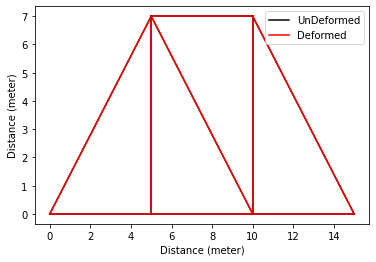

In [12]:
#Question 11 Bonous question

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os

nodes = [[0, 0], [5, 7], [5, 0], [10, 7], [10, 0], [15, 0]]
nodes1 = [[0,0], [5.0+Displacements[0],7.0+Displacements[1]],[5.0+Displacements[2], 0.0+Displacements[3]],[10.0+Displacements[4], 7.0+Displacements[5]],[10.0+Displacements[6], 0.0+Displacements[7]],[15,0]]
connections = np.array([[1, 2], [1, 3], [2, 3], [2, 4], [2, 5], [3, 5], [4, 5], [4, 6], [5, 6]]) - 1

plt.figure()
for connection in connections:
    initial, final = connection
    X1, Y1 = nodes1[initial]
    X2, Y2 = nodes1[final]
    x1, y1 = nodes[initial]
    x2, y2 = nodes[final]
    plt.xlabel("Distance (meter)")
    plt.ylabel("Distance (meter)")
    plt.plot([x1, x2], [y1, y2], color='black')
    plt.legend(['UnDeformed'])
    plt.plot([x1, x2], [y1, y2] , color='red')
    plt.legend(['UnDeformed','Deformed']) 
     
plt.show()
